In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np


## Ejercicio Puerto
Tenemos un puerto donde los barcos descargan. **Solo se puede descargar un barco a la vez.** Los barcos llegan a descargar al puerto y el tiempo de llegada entre dos barcos varia entre 15 y 55 minutos. El tiempo que tarda en descargar depende del tipo y la cantidad de carga, este tiempo varia entre 45 y 90 minutos. Simula el puerto en python asumiento los tiempos de llegada uniformes discretos(o continuos) constesta las siguientes preguntas:


Asume que el puerto abre a las 5 de la mañana y cierra a la 1 de la mañana del dia siguiente.

In [2]:
B1=[0,(random.random()*40)+15]
Count1=[1]
#B1 inicia con 2 elementos y Count con 1, pues al graficar, usare uno más de B1 para que se hagan los intervalos
i=0 #Contador
while sum(B1)< 1200: #Mientras la suma de el tiempo de llegada sea menor a 1200 minutos (20 horas)
  llegada1=(random.random()*40)+15 #Eligo un numero random entre 15 y 55
  B1.append(llegada1) #Agrego este número (tiempo de llegada) a mi lista B1
  Count1.append(Count1[i]+1) #Agrego a la lista contador un elemento que es el anterior + 1
  i=i+1 #Sumo 1 al contador
if sum(B1)== 1200: #Si al terminar la suma de B1 es = a 1200, se queda igual, (si es menor se repetiria otra iteración)
  B1=B1
  Count1=Count1
elif sum(B1)> 1200: #Si al terminar la suma es mayor, quiere decir que el ultimo barco llego despues del cierre, por lo que lo eliminaremos de la lista
  B1.pop(-1)
  Count1.pop(-1)
Bp1=[] #En esta lista agregare las sumas acumuladas
for i in range (len(B1)): #En este caso no me preocupo, pues si i+1 sale del rango, solo lo ignora y supone que estoy tomando toda la lista
  BP1=sum(B1[:i+1])
  Bp1.append(BP1)

In [3]:
#Ahora hare mi lista de tiempos de carga
B2=[B1[1],(random.random()*45)+45] #Pues la primera carga empieza cuando el primer barco llega y añado de una ves un random entre 45 y 90 (por lo mismo que antes añadi el 0 y el random entre 15 y 55)
for i in range (1,len(Count1)):
  B2.append((random.random()*45)+45)
#Ya tengo mis tiempos de descarga, ahora hare el codigo que me diga en que momento se empieza a cargar cada barco
Bp2=[] #Lista donde agregare los tiempos de carga ya aplicados al modelo
for i in range (len(B2)):
  BP2=sum(B2[:i+1])#Tomo la suma hasta el termino i (contando i)
  if BP2<Bp1[i]: #Si esta suma es menor que el tiempo de llegada del siguiente barco
    Bp2.append(sum(B1[:i+2])+B2[i]) #Lo que hara es que el barco empiece a cargar apenas llegue (Pues el otro termino de cargar antes que este llegue)
  else:
    Bp2.append(BP2) #De otra forma, empezara a cargar apenas el otro termine de cargar

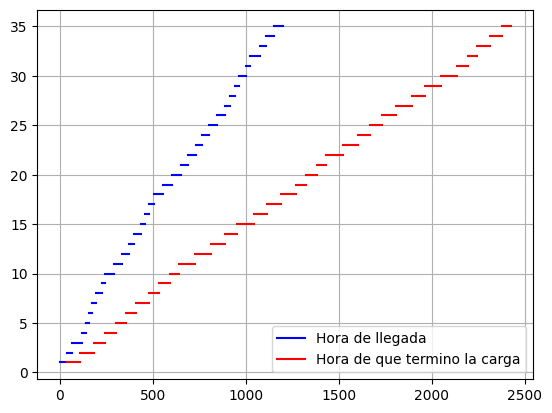

In [14]:
plt.plot([Bp1[0],Bp1[1]],[Count1[0],Count1[0]],'b',label='Hora de llegada')
for i in range (1,len(Count1)):
  plt.plot([Bp1[i],Bp1[i+1]],[Count1[i],Count1[i]],'b')
#Grafico el numero de barcos respecto a su tiempo de llegada, por el Bp1[i+1] es que necesitaba que len(Bp1)=len(Count1)+1

plt.plot([Bp2[0],Bp2[1]],[Count1[0],Count1[0]],'r',label='Hora de que termino la carga')
for i in range (1,len(Count1)):
  BP2=sum(B2[:i+1])#Tomo la suma hasta el termino i (contando i)
  if BP2<=Bp1[i]: #Igual que antes si se da que aun no llega el siguiente barco cuando el que esta ya acabo de descargar, se graficara el tiempo empezando con su hora de llegada dle siguiente barco
    plt.plot([Bp1[i],Bp2[i]],[Count1[i],Count1[i]],'r')
  else: #Si no empezara a descargar apenas el otro acabe
    plt.plot([Bp2[i],Bp2[i+1]],[Count1[i],Count1[i]],'r')

plt.legend()
plt.grid()

###-¿Cuál es el tiempo promedio y tiempo maximo en el puerto por barco?


In [5]:
#Para tomar el promedio del barco, solo falta tomar la diferencia entre la hora de llegada y la hora que termina la carga y sacar promedio
P1=[Bp2[i+1]-Bp1[i+1] for i in range (len(Bp2)-1)] #Tomo a partir del segundo termino de las listas, pues el primero solo era para saber a que hora empezaba el conteo de llegada y carga
P= sum(P1)/len(P1)
print(f'El promedio de tiempo en el puerto es de {P} minutos')

El promedio de tiempo en el puerto es de 668.1599035642178 minutos


In [6]:
#Teniendo ya los tiempos de espera solo tomo el maximo de mi lista P1
M=max(P1)
print(f'El tiempo maximo de tiempo en el puerto fue de {M} minutos')

El tiempo maximo de tiempo en el puerto fue de 1228.1911563599042 minutos


###- Si el tiempo de espera para el barco es el tiempo entre su llegada y el tiempo en que empieza a descargar. ¿Cuál es el tiempo promedio y el tiempo maximo de espera?


In [7]:
#Para sacar este tiempo tomaremos la diferencia entre el momento en el que empieza a descargar menos la hora a la que llega
E1=[Bp2[i]-Bp1[i+1]for i in range (len(Bp2)-1)] #A la hora a la que empieza a descargar le resto la hora de llegada, aqui no hay problema que no tome el ultimo elemento de Bp2, pues este representa cuando acaba de descargar el ultimo barco
Ep=sum(E1)/ len(E1)
print(f'El promedio de tiempo de espera es de {Ep} minutos')

El promedio de tiempo de espera es de 599.9485911719222 minutos


In [8]:
#Para el tiempo maximo hago casi lo mismo
ME=max(E1)
print(f'El tiempo maximo de espera fue de {ME} minutos')

El tiempo maximo de espera fue de 1178.5714966688406 minutos


### - ¿Qué porcentaje del tiempo esta ocupado el puerto?


In [9]:
#Para esto supondre el tiempo total como la hora que el ultimo barco descarga
T=Bp2[-1]
P=[B1[1]]#Lista donde agregare los tiempos libres, y por complemento sacare el tiempo ocupado (Notar que el tiempo en el que llega el primer barco es libre pues no hay ninguno antes)
#El tiempo libre seria cuando un barco a terminado de descargar y el otro aun no a llegado
#Esto pasa si la hora de descarga es menor a la hora de llegada del siguiente barco
for i in range (1,len(Bp1)-1): #El ultimo no nos sirve pues al no haber barco despues, no importa a que hora acaba de descargar y empiezo en 1 pues en 0 es cuando ningun barco a llegado
  if Bp2[i]<Bp1[i+1]: #Si la hora de descarga es menor que la hora de llegada del siguiente barco.
    P.append(Bp1[i]-Bp2[i-1]) #Agrego a mi lista la diferencia, es decir el tiempo libre
  else:
    P.append(0)
Por=1-(sum(P)/T)
print(f'El porcentaje de tiempo en el que esta ocupado es de {Por*100}% del tiempo')

El porcentaje de tiempo en el que esta ocupado es de 98.4137675179894% del tiempo


###- ¿Cuál es la longitud de la cola mas larga?

In [10]:
#Para esto puedo hacer lo mismo, solo que supondre que los barcos llegan cada 15 min y descargan en 90 min
LL=[0,15]
ContM=[1]
iM=0
while sum(LL)< 1200:
  LL.append(15)
  ContM.append(ContM[iM]+1)
  iM=iM+1
LLs=[]
for i in range (len(LL)):
  LL1=sum(LL[:i+1])
  LLs.append(LL1)

In [11]:
BM=[LL[1],90]
for i in range (1,len(ContM)):
  BM.append(90)
BM2=[] #Lista donde agregare los tiempos de carga ya aplicados al modelo
for i in range (len(BM)):
  BPM=sum(BM[:i+1])#Tomo la suma hasta el termino i (contando i)
  BM2.append(BPM) #Aqui no se toma el caso en el que descarga antes que el otro llegue pues no es posible por los tiempos

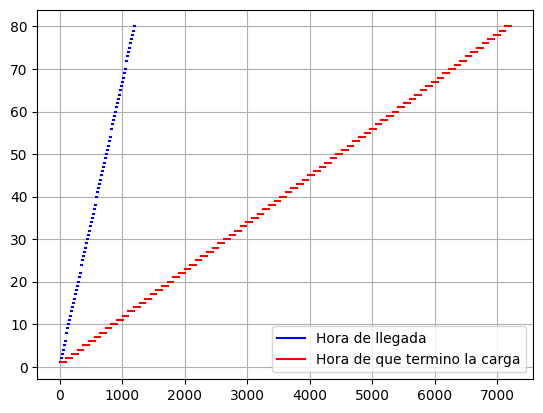

In [12]:
plt.plot([LLs[0],LLs[1]],[ContM[0],ContM[0]],'b',label='Hora de llegada')
for i in range (1,len(ContM)):
  plt.plot([LLs[i],LLs[i+1]],[ContM[i],ContM[i]],'b')

plt.plot([BM2[0],BM2[1]],[ContM[0],ContM[0]],'r',label='Hora de que termino la carga')
for i in range (1,len(ContM)):
  plt.plot([BM2[i],BM2[i+1]],[ContM[i],ContM[i]],'r')
plt.legend()
plt.grid()

In [13]:
print(f'La longitud de cola más larga es de {ContM[-1]} barcos')

La longitud de cola más larga es de 80 barcos
